In [1]:
#import statements
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read our data in via pandas into a dataframe
data = pd.read_csv('trafficking.csv')

#make a copy of this data frame because we will be appending a column to it
data_copy = data

In [3]:
#prep for standardization
columns_to_standardize = ['age', 'length']

#standardize our data using based on their zscore
data_copy_standardized = stats.zscore(data_copy[columns_to_standardize])

In [4]:
#prepare and fit our KMeans model
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_copy_standardized)

#get our labels (which cluster) and add this column to data_copy
labels = kmeans.labels_

data_copy['clusters'] = labels

columns_to_standardize.extend(['clusters'])

In [5]:
#print out the average age and length of each of the different clusters
print(data_copy[columns_to_standardize].groupby(['clusters']).mean())

                age      length
clusters                       
0         47.156250  133.875000
1         21.582278  104.126582
2         38.346939  262.346939


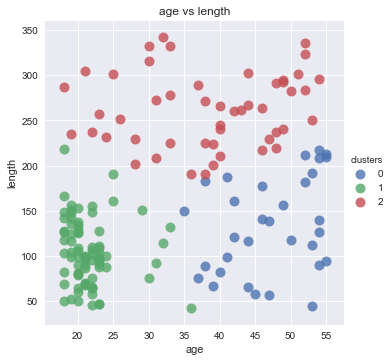

In [6]:
#lets visualize this in a simple 2d scatter plot
sns.lmplot('age', 'length', data=data_copy, fit_reg=False, hue='clusters', scatter_kws={'marker': 'D', 's': 100})

plt.title('age vs length')

plt.xlabel('age')

plt.ylabel('length')

plt.show()